# Homework Assignment 2

### Problem 1: Hough Transform

- Implement the Hough Transform (HT) using the ($\rho$, $\theta$) parameterization as described during lecture (and in Gonzalez and Woods Third Edition p. 733-738 -- see `HoughTransform.pdf' provided in the data folder). Use accumulator cells with a resolution of 1 degree in $\theta$ and 1 pixel in $\rho$.



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# assuming that the input image is already canny edge detected.
def hough_transform(image):
  height, width= image.shape # getting the image dimensions

  # we must find the maximum possible rho value using the pythagorean theroem
  maximum_rho  = int(np.sqrt(height**2 + width**2))

  # this vector will be the accumulator
  hough_space = np.zeros((2 * maximum_rho, 180), dtype=np.int32) # setting the initial vector to be all zeroes with max values of 2 * max_rho and 180 for theta

  y, x = np.nonzero(image)
  paired = zip(y,x) # pairing the y,x into a tuple (y,x)

  for y,x in paired:
    for theta in range(180): # theta range from 0 - 180
      theta_radians = np.deg2rad(theta) # converting theta from degrees to radians
      rho = round((x* np.cos(theta_radians)) + (y * np.sin(theta_radians))) # finding rho by plugging in y, x, and theta, converting it to int so that i dont get any floating point numbers
      rho_index = rho + maximum_rho
      if 0 <= rho_index < 2 * maximum_rho:
        hough_space[rho_index, theta] += 1 # incrementing the accumulator

  return hough_space




- Create a simple $11\times11$ test image made up of zeros with 5 ones in it, arranged like the 5 points in GW Third Edition Figure 10.33(a). Assuming each one is an "edge", compute and display its HT; the result should look like GW Third Edition Figure 10.33(b). Threshold the HT by looking for any $(\rho, \theta)$ cells that contains more than 2 votes then plot the corresponding lines in (x,y)-space on top of the original image.

*Keep in mind that you may need to modify your colormap or change the value for 'one's in order to properly display your image.*


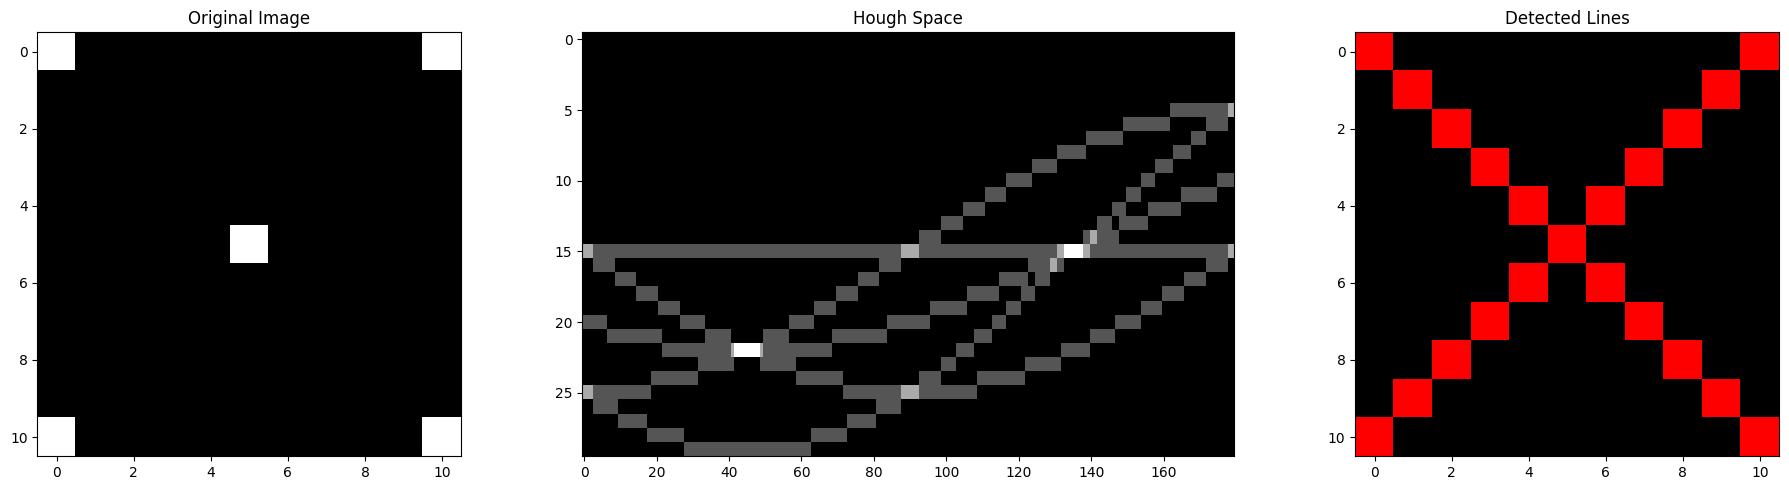

In [2]:
image = np.zeros((11, 11), dtype=np.uint8)
ones = [(5, 5), (0, 0), (0, 10), (10, 0), (10, 10)] # arranging the ones like in figure 10.33(a)
for y, x in ones:
    image[y, x] = 1

# converting the test image from a binary image to a grayscale image with the edges being the areas with value 1
edges = (image * 255).astype(np.uint8)

# running my hough transform function on the updated test image
hough_space = hough_transform(edges)


# displaying the original test image
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.grid(False)

# displaying the hough space of the edge test image
plt.subplot(1, 3, 2)
plt.imshow(hough_space, cmap='gray', aspect='auto')
plt.title('Hough Space')
plt.grid(False)

# creating a new image of xy space to overlay on the the hough space
xy_space = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR)

rho_max = hough_space.shape[0] // 2 # maximum distance from point to origin

for rho in range(hough_space.shape[0]): #iterating through all of the rho values in the hough space
    for theta in range(180): # maximum theta range is 180
        if hough_space[rho, theta] > 2: # applying the threshold of 2
            theta_radians = np.deg2rad(theta) # converting theta from degrees to radians

            x0 = (np.cos(theta_radians)) * (rho - rho_max)
            y0 = (np.sin(theta_radians)) * (rho - rho_max)

            x1 = int(x0 + 1000 * (- (np.sin(theta_radians))))
            y1 = int(y0 + 1000 * (np.cos(theta_radians)))
            x2 = int(x0 - 1000 * (- (np.sin(theta_radians))))
            y2 = int(y0 - 1000 * (np.cos(theta_radians)))

            cv2.line(xy_space, (x1, y1), (x2, y2), (255, 0, 0), 1)

plt.subplot(1, 3, 3)
plt.imshow(xy_space)
plt.title('Detected Lines')
plt.grid(False)

plt.tight_layout()
plt.show()




- Load in the image `lane.png'. Compute and display its edges with an appropriate threshold. You may use your Canny Edge Detector from Homework 1, or the OpenCV Canny function: https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html





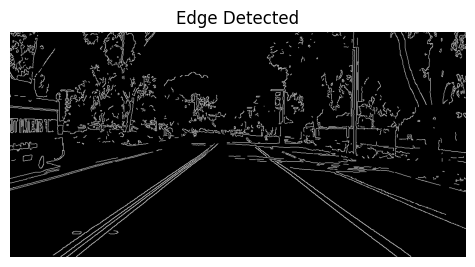

In [15]:
# from google.colab import files
# uploaded = files.upload()

img = cv2.imread("lane.png")
bgr_2_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_E = cv2.Canny(img, 200, 300)

# displaying edge detected image
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_E, cmap='gray')
plt.title('Edge Detected')
plt.grid(False)
plt.axis('off')

plt.show()


- After computing the edges as a binary image $E$ and displaying the image, next compute and display the HT of the binary edge image $E$. As before, threshold the HT and plot the corresponding lines atop the original image; this time, use a threshold of 75\% maximum accumulator count over the entire HT.

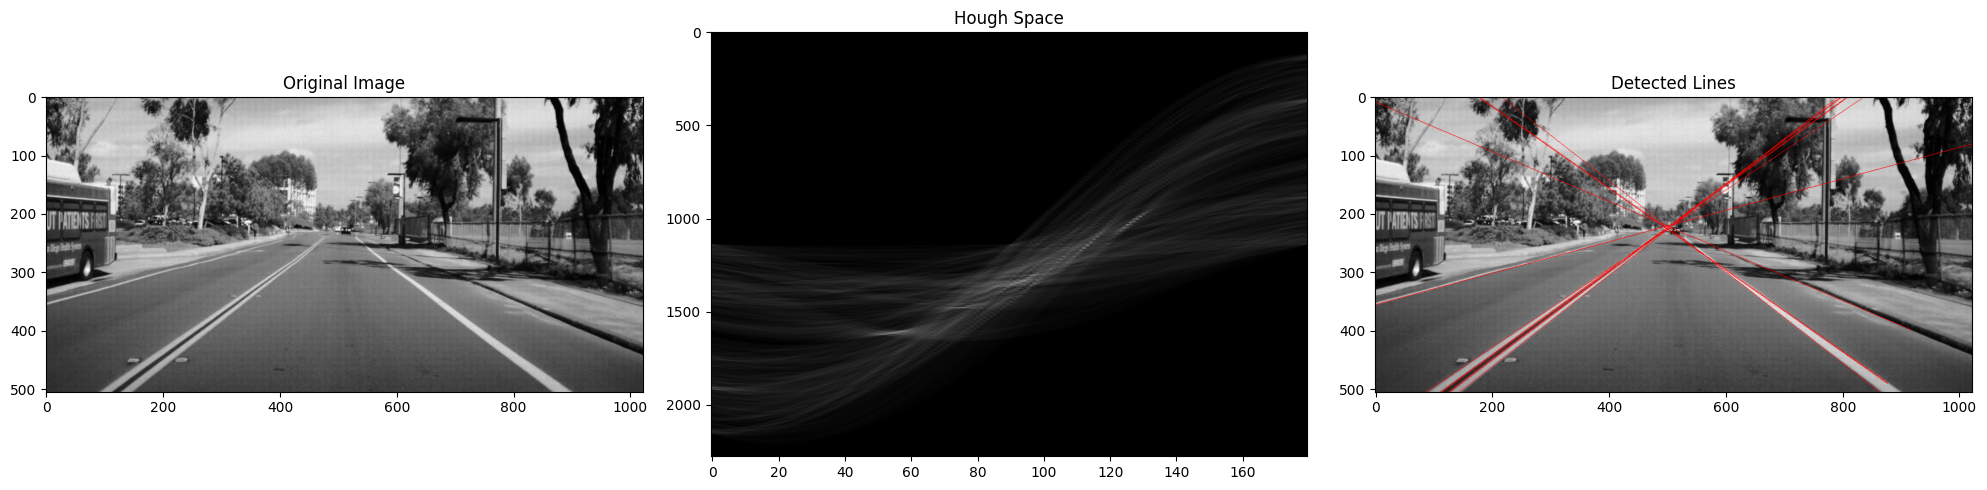

In [29]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.grid(False)

img_HT = hough_transform(img_E)

xy_space = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB)

threshold = 0.75 * np.max(img_HT)
rho_max = img_HT.shape[0] // 2

# for i in range(len(img_HT)):
#   print (img_HT[i])

for rho in range(img_HT.shape[0]):
  for theta in range(180):
    if img_HT[rho,theta] > threshold:
      theta_radians = np.deg2rad(theta) # converting theta from degrees to radians

      x0 = (np.cos(theta_radians)) * (rho - rho_max)
      y0 = (np.sin(theta_radians)) * (rho - rho_max)

      x1 = int(x0 + 1000 * (- (np.sin(theta_radians))))
      y1 = int(y0 + 1000 * (np.cos(theta_radians)))
      x2 = int(x0 - 1000 * (- (np.sin(theta_radians))))
      y2 = int(y0 - 1000 * (np.cos(theta_radians)))

      cv2.line(xy_space, (x1, y1), (x2, y2), (255, 0, 0), 1)


plt.subplot(1, 3, 2)
plt.imshow(img_HT, cmap='gray', aspect='auto')
plt.title('Hough Space')
plt.grid(False)

plt.subplot(1, 3, 3)
plt.imshow(xy_space)
plt.title('Detected Lines')
plt.grid(False)

plt.tight_layout()
plt.show()



- We would like to only show line detections in the driver's lane and ignore any other line detections such as the lines resulting from the neighboring lane closest to the bus, light pole, and sidewalks. Using the thresholded HT from the `lanes.png' image in the previous part, show only the lines corresponding to the line detections from the driver's lane by thresholding the HT again using a specified range of $\theta$ this time. What are the approximate $\theta$ values for the two lines in the driver's lane?

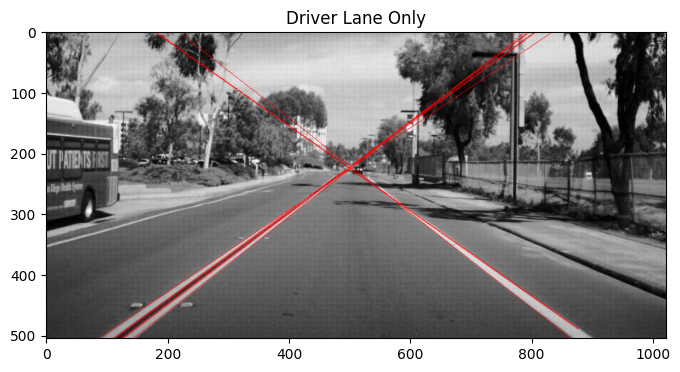

In [37]:
xy_space_2 = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2RGB)

for rho in range(img_HT.shape[0]):
  for theta in range(180):
    if img_HT[rho,theta] > threshold:
      if 120 <= theta <= 160 or 20 <= theta <= 60:
        theta_radians = np.deg2rad(theta)

        x0 = (np.cos(theta_radians)) * (rho - rho_max)
        y0 = (np.sin(theta_radians)) * (rho - rho_max)

        x1 = int(x0 + 1000 * (- (np.sin(theta_radians))))
        y1 = int(y0 + 1000 * (np.cos(theta_radians)))
        x2 = int(x0 - 1000 * (- (np.sin(theta_radians))))
        y2 = int(y0 - 1000 * (np.cos(theta_radians)))

        cv2.line(xy_space_2, (x1, y1), (x2, y2), (255, 0, 0), 1)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 3)
plt.imshow(xy_space_2)
plt.title('Driver Lane Only')
plt.grid(False)

plt.tight_layout()
plt.show()


# The approximate theta values are: between 20 and 60 for the left lane lines, and between 120 and 160 for the right lane lines

### Problem 2: Non-Max Suppression

In class and in the previous assignment, we learned about non-max suppression for edges. Here, we will extend the idea to a higher-level concept which will become useful as we continue working our way up the computational hierarchy, towards more abstract constructs than edges. In this case, we will consider detected objects. We consider an object "detected" by identifying a 2D bounding box which contains the object. In this problem you will implement non-maximum suppression for object detection. One of the most common problems with object detection algorithms is that rather than detecting an object just once, the algorithm might detect it multiple times. Take as an example the image below:

![Image Description](https://drive.google.com/uc?export=view&id=1dVPCIrkB5i5a9W-fHWJzUcyoL5AQjlTu)

In the previous image, there are multiple boxes detecting the same car. The Non-Max Suppression technique tries to clean up this prediction to get only a single detection per object.

It first takes the detection with highest probability. In the above image, it will select the bounding box with 0.9 prediction. Then it will supress the boxes with high IoU with respect to the previoulsy selected one. So, the boxes with 0.6 and 0.7 probabilities will be suppressed in our example.

Let's first implement a function for Intersection-Over-Union (IoU). Consier the two boxes below. IoU = Area of the yellow box (Intersection) / Area of the green box (Union)

![Image Description](https://drive.google.com/uc?export=view&id=1d7tbFMxagkBp7U4IwiciBVpdjEpbzDKJ)

In [44]:
import numpy as np

# complete the function below
def iou(box1, box2):
  ## box = [x1, y1, x2, y2] where x1, y1 is the top left corner of the box and x2, y2 is the bottom right corner of the box

  # determine the (x, y)-coordinates of the intersection rectangle

  # using this resource: https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/
  xi1 = max(box1[0], box2[0])
  yi1 = max(box1[1], box2[1])
  xi2 = min(box1[2], box2[2])
  yi2 = min(box1[3], box2[3])

  # compute the area of intersection rectangle
  inter_area = max(0, xi2 - xi1 + 1) * max(0, yi2 - yi1 + 1)

  box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
  box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)

  # compute the intersection over union by taking the intersection area and dividing it by the union area.
  # Be careful to avoid double-counting the intersection in your formulation!
  union_area = float(box1_area + box2_area - inter_area)

  iou = inter_area / union_area
  return iou

Now, we can see if our function is correct. First, we can try with two identical boxes, where the IoU should be 1.

In [45]:
box1 =[10, 50, 30, 80]
box2 = [10, 50, 30, 80]
print(iou(box1, box2))

1.0


In the following code, we can check the IoU of two boxes with no intersection. The IoU should be 0.

In [46]:
box1 = [10, 50, 30, 80]
box2 = [40, 50, 50, 80]
print(iou(box1, box2))

0.0


Now, we will create an NMS function. As an intermediate step, the IoU function created before finds the IoU between two boxes, but we would like to find the IoU between one box and many others by completing the code below. You can call on your previous function.

In [47]:
# complete the function bellow
def iou_many(box, boxes):
  ## box = [x1, y1, x2, y2] where x1, y1 is the top left corner of the box and x2, y2 is the bottom right corner of the box
  ## boxes = N x [xn1, yn1, xn2, yn2]
  # Return a list of IoU scores between 'box' and each box in 'boxes'

  iou_scores = []
  for i in range(len(boxes)):
    xi1 = max(box[0], boxes[i][0])
    yi1 = max(box[1], boxes[i][1])
    xi2 = min(box[2], boxes[i][2])
    yi2 = min(box[3], boxes[i][3])

    inter_area = max(0, xi2 - xi1 + 1) * max(0, yi2 - yi1 + 1)

    box1_area = (box[2] - box[0] + 1) * (box[3] - box[1] + 1)
    box2_area = (boxes[i][2] - boxes[i][0] + 1) * (boxes[i][3] - boxes[i][1] + 1)

    union_area = float(box1_area + box2_area - inter_area)
    iou = inter_area / union_area

    iou_scores.append(iou)

  return iou_scores

Now, complete the NMS function. The provided comments are intended to provide one set of steps you can use to solve the problem, but you are welcome to modify the approach.

In [61]:
# complete the function below
def nms(boxes, scores, IoUthreshold):
  # param1: boxes is a list of boxes = N x [xn1, yn1, xn2, yn2]
  # param2: scores is a list of confidences for boxes, e.g., [0.8, 0.2, 0.5, 0.4]
  # param3: IoUthreshold is the threshold of IoU when comparing boxes
  # returns: indices of selected boxes with non-maximal confidence detections removed

  # if there are no boxes, return an empty list
  if len(boxes) == 0:
    return []

  # initialize the list of selected indices
  pick = []

  # Sort the indices by the score
  idxs = np.argsort(scores)

  # keep looping while some indices still remain in the indices list
  while len(idxs) > 0:

    # Choose the index with highest score and add the index value to the list of picked indices
    last = len(idxs) - 1
    i = idxs[last]
    pick.append(i)

    ious = iou_many(boxes[i], boxes[idxs[1:]])

    # Delete all indices from the index list that have overlap > overlapThresh

    idxs = idxs[np.where(np.array(ious) <= IoUthreshold)[0] + 1]



  # return only the indices of the bounding boxes that were picked
  return np.asarray(pick)

Let's test the function with the example car boxes from before.


In [62]:
boxes = np.array([[29, 94, 110, 140],
         [40, 100, 123, 153],
         [206, 82, 316, 118],
         [222, 92, 328, 127],
         [250, 94, 328, 142]])
scores = [0.8, 0.7, 0.6, 0.9, 0.7]

# show results of using a large IoU threshold
print(nms(boxes, scores, IoUthreshold=0.9))

# show results of using a small IoU threshold
print(nms(boxes, scores, IoUthreshold=0.1))

[3 0 4]
[3 0]


Question: If we would like less remaining bounding boxes, should we choose a large or small IoU threshold?

# You would want a smaller IOU threshold to get less bounding boxes because it would have more strict filtering

### Problem 3: Coplanar Vectors

Prove that if a⋅(b×c)=0, then vectors a, b, and c are coplanar.

# lets say that a = (1,2,3), b = (4,5,6), and c = (7,8,9). By taking the cross product of b and c, we can end up getting (5(9) - 6(8))i - (6(7) - 4(9))j + (4(8) - 5(7))k, which turns into b cross c = (-3, 6, -3). Now, doing a dot (b cross c), we get = -3 + 12 - 9 = 0, meaning that all of the vectors are on the same plane == coplanar.

### Problem 4: Orthogonal Matrix Multiplication

Prove that mutiplying a vector by an orthogonal matrix will not change the 'length' (i.e. magnitude) of the vector.

*Hint: what happens when you square the magnitude of Ax, where x is some vector and A is an orthogonal matrix?*

# Say we have an orthogonal matrix A = [-1, 0, 0, 1]. We know that this matrix is orthogonal because A * A.T is equal to the identity matrix [1,0,0,1]. Now, say that we have vector B = [3,4]. The magnitude of B is sqrt(3<sup>2</sup> + 4<sup>2</sup>) = 5. If we mulitply A and B, we would get C = [(-1)(3) + 0(4), 0(3) + (1)(4)] = [-3, 4]. Now, taking the magnitude of C, we get sqrt(-3<sup>2</sup> + 4<sup>2</sup>) = 5. Because the magnitude of B == magnitude of C, multiplying a vector by an orthogonal matrix does not change the length of the vector.